### Практика 2

In [2]:
# Библиотека
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Загрузка данных
df = pd.read_csv("S02-hw-dataset.csv")   # замените на ваш путь/файл


In [11]:
# 3. Вывод первых строк датасета
print("Первые строки датасета:")
print(df.head(20))

Первые строки датасета:
    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          

In [6]:
# Информация о столбцах и типах данных
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [7]:
# Базовые описательные статистики
print("\nОписание числовых признаков:")
print(df.describe())


Описание числовых признаков:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [8]:
# Доля пропусков
missing_share = df.isna().mean().sort_values(ascending=False)
print("Доля пропусков в каждом столбце:")
print(missing_share)

Доля пропусков в каждом столбце:
age          0.04878
user_id      0.00000
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [9]:
# Количество полных дубликатов
duplicates_count = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates_count}")

# При необходимости вывести сами дубликаты:
if duplicates_count > 0:
    print(df[df.duplicated()])

Количество полностью дублирующих строк: 1
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


In [12]:
neg_values = df[(df['purchases'] < 0) | (df['revenue'] < 0)]
print("Строки с отрицательными purchases или revenue:")
print(neg_values)

Строки с отрицательными purchases или revenue:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [13]:
age_outliers = df[(df['age'] > 100) | (df['age'] < 0)]
print("Строки с нереалистичным возрастом:")
print(age_outliers)

Строки с нереалистичным возрастом:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [14]:
logic_issue_1 = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print("Покупки > 0, но revenue = 0:")
print(logic_issue_1)

Покупки > 0, но revenue = 0:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


# 2.3.3

In [16]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [17]:
df.groupby("country").agg({
    "age": "mean",
    "purchases": ["mean", "sum"],
    "revenue": ["mean", "sum"]
})

age purchases          revenue       
              mean      mean sum         mean    sum
country                                             
CN       24.000000  4.500000   9  1054.000000   2108
DE       34.600000  6.500000  39  1445.500000   8673
FR       46.250000  4.250000  51   675.916667   8111
RU       30.076923  4.769231  62   790.076923  10271
US       36.714286  4.625000  37   557.375000   4459

In [21]:
bins = [0, 30, 45, 60, 200]
labels = ["18–30", "31–45", "46–60", "60+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
print(df["age_group"])

0     18–30
1     18–30
2     46–60
3     31–45
4       NaN
5       60+
6     46–60
7     18–30
8     31–45
9     18–30
10    18–30
11    18–30
12      NaN
13    31–45
14    46–60
15    18–30
16    31–45
17    18–30
18    46–60
19    31–45
20    18–30
21    31–45
22    31–45
23    31–45
24    18–30
25    31–45
26    46–60
27    31–45
28    46–60
29    46–60
30    46–60
31    18–30
32    18–30
33    18–30
34    31–45
35    46–60
36    18–30
37    31–45
38    31–45
39    31–45
40    18–30
Name: age_group, dtype: category
Categories (4, object): ['18–30' < '31–45' < '46–60' < '60+']


# 2.4

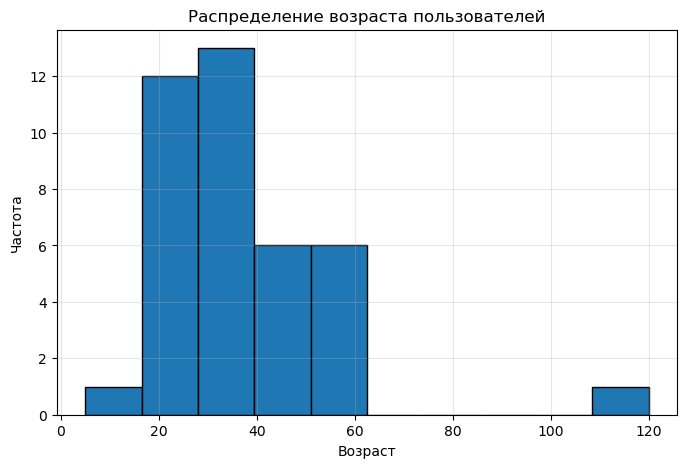

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df["age"].dropna(), bins=10, edgecolor="black")
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.grid(alpha=0.3)

# сохраняем сюда: d:\...\homeworks\HW02\figures\age_hist.png
plt.savefig("figures/age_hist.png", dpi=150)
plt.show()

<Figure size 800x500 with 0 Axes>

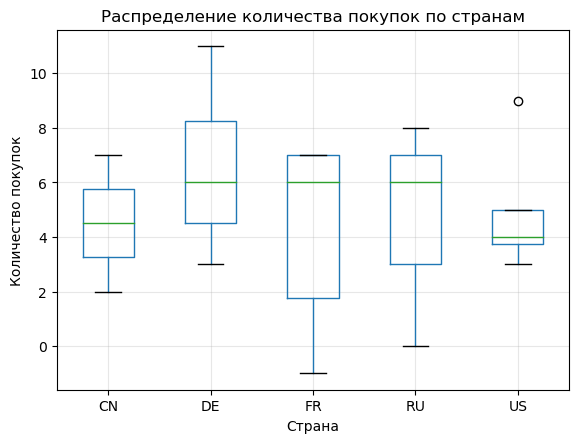

In [28]:
plt.figure(figsize=(8, 5))
df.boxplot(column="purchases", by="country")
plt.title("Распределение количества покупок по странам")
plt.suptitle("")  # убирает лишний заголовок от Pandas
plt.xlabel("Страна")
plt.ylabel("Количество покупок")
plt.grid(alpha=0.3)
plt.show()

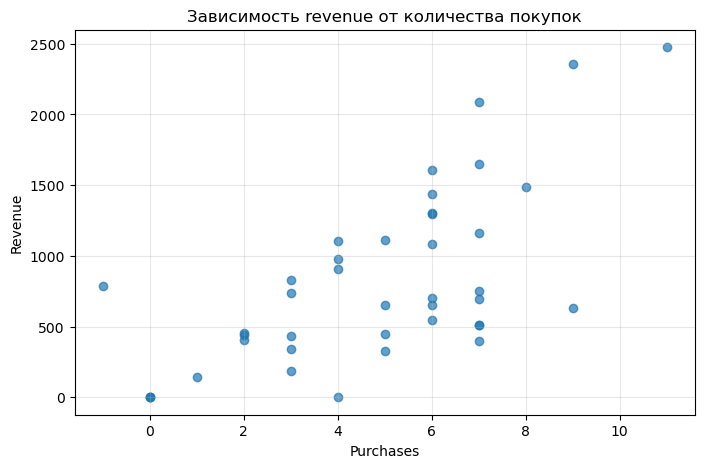

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(df["purchases"], df["revenue"], alpha=0.7)

plt.title("Зависимость revenue от количества покупок")
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

'd:\\Papki\\Универ\\Инженерия_искусственного_интелекта_Допы\\AIE_studying\\homeworks\\HW02'